In [1]:
import pandas as pd
import numpy as np
import calculate as calc
import plot as plo

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from plot import get_cohort_careerage_df

In [2]:
authorStartEndCareerData = pd.read_csv('./derived-data/authors-scientific-atleast-1-year.csv')
#authorStartEndCareerData = pd.read_csv('./derived-data/authors-scientific-atleast-10-year.csv')
authorStartEndCareerData.head(n=20)

,author,start_year,end_year,num_pub,career_length,max_absence,avg_absence,dropped_after_10,gender
0,'maseka lesaoana,2001,2015,2,15,14,7.500000,True,none
1,(max) zong-ming cheng,2009,2011,2,3,13,7.500000,True,none
2,(zhou) bryan bai,2011,2012,2,2,14,7.500000,True,none
3,a aart blokhuis,1992,2005,2,14,13,7.500000,True,none
4,a ahrabian,2017,2017,1,1,15,15.000000,True,none
5,a el sharkawi,2002,2002,1,1,15,15.000000,True,none
6,a kopec,2003,2003,1,1,15,15.000000,True,none
7,a lun,2010,2010,1,1,15,15.000000,True,none
8,a mete,2008,2008,1,1,15,15.000000,True,none
9,a min tjoa,1979,2017,191,39,7,1.000000,False,none


In [3]:
END_YEAR = 2018
MAX_CAREER_LENGTH_COHORT = 15

years = authorStartEndCareerData['start_year'].unique()
years = sorted(years)
cohort_start_years = [y for y in years if y < (END_YEAR - MAX_CAREER_LENGTH_COHORT)]

# smooth out the curve - group 2(or more) cohorts (start years) together
# 2 points on the plot get merged into one
num_years_in_cohort = 2

In [4]:
# smooth out the curve - group 2 cohorts (start years) together
# 2 points on the plot get merged into one

In [6]:
replace_dict = {}
cohort_start_years = list(range(cohort_start_years[0], cohort_start_years[-1], num_years_in_cohort))
for start_year in cohort_start_years:
    for i in range (1,num_years_in_cohort):
        replace_dict[start_year + i] = start_year
authorStartEndCareerData['start_year'] = authorStartEndCareerData['start_year'].replace(replace_dict)

In [7]:
import scipy.stats as stats

average_absence_cohort = authorStartEndCareerData.groupby('start_year')['avg_absence'].mean().loc[cohort_start_years]
average_max_absence_cohort = authorStartEndCareerData.groupby('start_year')['max_absence'].mean().loc[cohort_start_years]
std_max_absence_cohort = authorStartEndCareerData.groupby('start_year')['max_absence'].apply(lambda x: stats.sem(x)).loc[cohort_start_years]

authorStartEndCareerData_f = authorStartEndCareerData[authorStartEndCareerData["gender"]=="f"]
average_absence_cohort_f = authorStartEndCareerData_f.groupby('start_year')['avg_absence'].mean().loc[cohort_start_years]
average_max_absence_cohort_f = authorStartEndCareerData_f.groupby('start_year')['max_absence'].mean().loc[cohort_start_years]
std_max_absence_cohort_f = authorStartEndCareerData_f.groupby('start_year')['max_absence'].apply(lambda x: stats.sem(x)).loc[cohort_start_years]

authorStartEndCareerData_m = authorStartEndCareerData[authorStartEndCareerData["gender"]=="m"]
average_absence_cohort_m = authorStartEndCareerData_m.groupby('start_year')['avg_absence'].mean().loc[cohort_start_years]
average_max_absence_cohort_m = authorStartEndCareerData_m.groupby('start_year')['max_absence'].mean().loc[cohort_start_years]
std_max_absence_cohort_m = authorStartEndCareerData_m.groupby('start_year')['max_absence'].apply(lambda x: stats.sem(x)).loc[cohort_start_years]

authorStartEndCareerData_n = authorStartEndCareerData[authorStartEndCareerData["gender"]=="none"]
average_absence_cohort_n = authorStartEndCareerData_n.groupby('start_year')['avg_absence'].mean().loc[cohort_start_years]
average_max_absence_cohort_n = authorStartEndCareerData_n.groupby('start_year')['max_absence'].mean().loc[cohort_start_years]
std_max_absence_cohort_n = authorStartEndCareerData_n.groupby('start_year')['max_absence'].apply(lambda x: stats.sem(x)).loc[cohort_start_years]


/home/danielkostic/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/danielkostic/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Average waiting time analysis over cohorts

In [8]:
## We expect to see that average waiting times are decreasing over time since scientists recently form larger collaborations

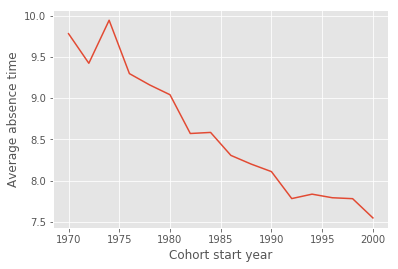

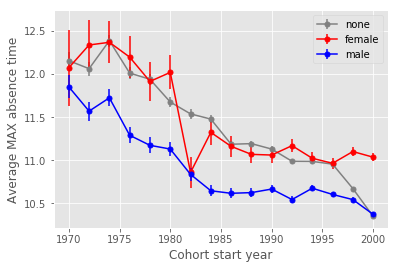

In [9]:
x = average_absence_cohort.index
y = average_absence_cohort.values
plt.plot(x,y)
plt.xlabel('Cohort start year')
plt.ylabel("Average absence time")
plt.show()


# print(std_max_absence_cohort)

fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1,1,1) #, axisbg="white"
x = average_max_absence_cohort.index
y = average_max_absence_cohort.values
x_f = average_max_absence_cohort_f.index
y_f = average_max_absence_cohort_f.values
x_m = average_max_absence_cohort_m.index
y_m = average_max_absence_cohort_m.values
x_n = average_max_absence_cohort_n.index
y_n = average_max_absence_cohort_n.values

#plt.plot(x,y)
ax.errorbar(x_n, y_n,  yerr=std_max_absence_cohort.values, marker='.', markersize=10, color="grey", label="none")
ax.errorbar(x_f, y_f,  yerr=std_max_absence_cohort_f.values, marker='.', markersize=10, color="red", label="female")
ax.errorbar(x_m, y_m,  yerr=std_max_absence_cohort_m.values, marker='.', markersize=10, color="blue", label="male")

plt.xlabel('Cohort start year')
plt.ylabel("Average MAX absence time")
plt.legend()
plt.show()


In [10]:
# unique_career_ages = np.unique(data["age"])
# max_years = np.max(unique_career_ages)
# cols = 5   
# nrows = int(math.ceil(float(max_years)/float(cols)))

In [11]:
# fig2, ax2 = plt.subplots(nrows=nrows, ncols=cols, sharex=True, sharey=True, figsize=(16,10))

In [12]:
# p = get_cohort_careerage_df(cohort_start_years, 15, 'avg_absence', authorStartEndCareerData)

## Dropouts

In [13]:
inactive = authorStartEndCareerData.groupby(['start_year', 'gender'])['dropped_after_10'].sum()

In [14]:
total = authorStartEndCareerData.groupby(['start_year', 'gender'])['dropped_after_10'].count()

In [15]:
inactive = inactive.to_frame()
inactive['all'] = total

In [16]:
inactive.head()

dropped_after_10   all
start_year gender                        
1970       f                   71.0    96
           m                  663.0   945
           none               530.0   703
1972       f                  136.0   181
           m                 1013.0  1465

In [17]:
inactive['percent_dropped'] = (inactive['dropped_after_10']*100)/inactive['all']

In [18]:
inactive = inactive.loc[cohort_start_years]

In [19]:
inactive.reset_index(inplace=True)

In [20]:
data_m = inactive[inactive['gender']=='m']
data_f = inactive[inactive['gender']=='f']
data_n = inactive[inactive['gender']=='none']

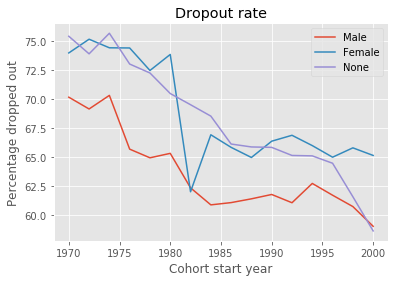

In [21]:
plt.plot(data_m['start_year'], data_m['percent_dropped'], label='Male')
plt.plot(data_f['start_year'], data_f['percent_dropped'], label='Female')
plt.plot(data_n['start_year'], data_n['percent_dropped'], label='None')
plt.title("Dropout rate")
plt.ylabel('Percentage dropped out')
plt.xlabel('Cohort start year')
plt.legend()
plt.show()

## Cliffs delta analysis

In [22]:
male = authorStartEndCareerData[authorStartEndCareerData.gender == 'm'].max_absence

In [23]:
female = authorStartEndCareerData[authorStartEndCareerData.gender == 'f'].max_absence

In [24]:
print(male.shape)
print(female.shape)

(793766,)
(255500,)


In [25]:
# over whole dataset
# do not run, compute heavy
# calc.cliffsD(male, female)
# -0.056557295548457606

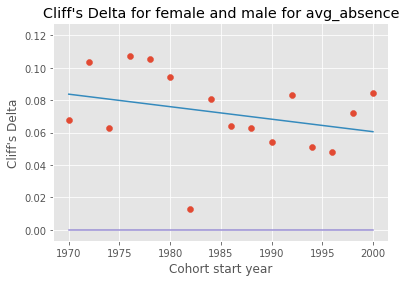

In [26]:
cd11 = calc.cliffs_delta_cohorts(authorStartEndCareerData, 'gender', 'f', 'm', 'avg_absence', cohort_start_years)
plo.plot_cliffs_delta(cd11, 'female', 'male', 'avg_absence')

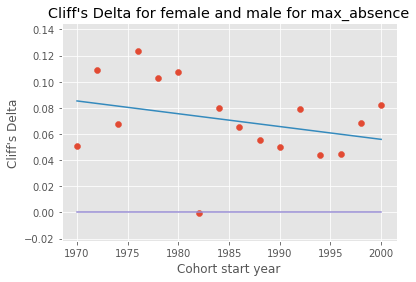

In [27]:
cd2 = calc.cliffs_delta_cohorts(authorStartEndCareerData, 'gender', 'f', 'm', 'max_absence', cohort_start_years)
plo.plot_cliffs_delta(cd2, 'female', 'male', 'max_absence')

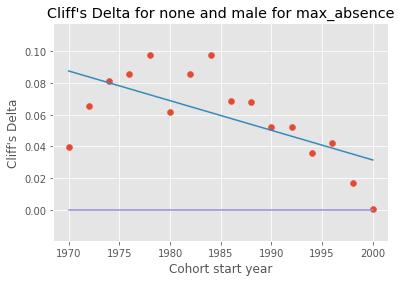

In [28]:
cd3 = calc.cliffs_delta_cohorts(authorStartEndCareerData, 'gender', 'none', 'm', 'max_absence', cohort_start_years)
plo.plot_cliffs_delta(cd3, 'none', 'male', 'max_absence')

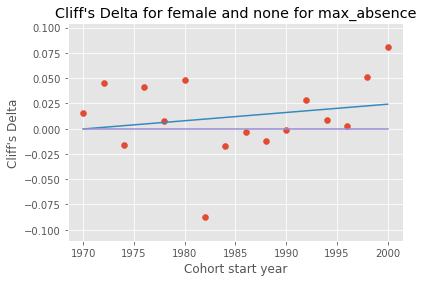

In [29]:
cd4 = calc.cliffs_delta_cohorts(authorStartEndCareerData, 'gender', 'f', 'none', 'max_absence', cohort_start_years)
plo.plot_cliffs_delta(cd4, 'female', 'none', 'max_absence')